In [96]:
from openpyxl import load_workbook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
wb = load_workbook('inMarket_Data_Challenge__py.xlsx')
sheet = wb.get_sheet_by_name('Data')

In [3]:
def excel_table_to_df(start_cell, end_cell, excel_sheet):
    '''
    (string,string,openpxl excel sheet object) -> df
    Input string for first cell and last cell in table,
    and output is a pandas df
    '''
    
    sheet_table = sheet[start_cell:end_cell]

    data_headers = []
    for cell in sheet_table[0]:
        data_headers.append(cell.value)

    data_rows = []
    for row in sheet_table[1:]:
        data_cols = []
        for cell in row:
            data_cols.append(cell.value)
        data_rows.append(data_cols)

    return_df = pd.DataFrame(data_rows,columns=data_headers)
    
    return return_df

In [4]:
stores_df = excel_table_to_df('A5','D273', sheet)
ages_df = excel_table_to_df('F5','H11', sheet)

In [73]:
#creating new column customer_buy_% for each dataframe
stores_df['Customer_Buy_%'] = stores_df['Customers'] / (stores_df['Non-Customers'] + stores_df['Customers'])
ages_df['Customer_Buy_%'] = ages_df['Customers'] / (ages_df['Non-Customers'] + ages_df['Customers'])

#Creating column for Total # of Customers
stores_df['Total Customers'] = (stores_df['Non-Customers'] + stores_df['Customers'])
ages_df['Total Customers'] = (ages_df['Non-Customers'] + ages_df['Customers'])

#Creating column for % of total customer+non-customer population
stores_df['% of Total Population'] = (stores_df['Non-Customers'] + stores_df['Customers']) / stores_df['Total Customers'].sum()
ages_df['% of Total Population'] = ages_df['Total Customers'] / ages_df['Total Customers'].sum()

#Creating column for % of total customer population
ages_df['% of Total Sales'] = ages_df['Customers'] / ages_df['Customers'].sum()
stores_df['% of Total Sales'] = stores_df['Customers'] / stores_df['Customers'].sum()

<h1>Intro</h1>

Below is a exploratory data analysis of sales data of a children's electrolyte drink. There are two data tables used from a local excel file, a Stores Visited and Age Range table.

The excel file needed to be slightly prepped to conduct this analysis through Python, the prepping involved simply removing the formatting from the Excel file.

To find more insights into the data additional columns were created and added to the above tables. The most significant one being "Customer_Buy_%".

Customer Buy % is used extensively throughout this analysis and it represents what portion of total customers that visited a store ended up buying the product. I used this new metric in conjunction with Total Customer Sales ("Customer" column) to evaluate how well stores/chain categories are at producing sales for the product.

In [74]:
#preview of age data table
ages_df.head()

,Age range,Non-Customers,Customers,Customer_Buy_%,Total Customers,% of Total Population,% of Total Sales
0,Age 0-18,1340.0,391.0,0.225881,1731.0,0.155792,0.070021
1,Age 19-25,502.0,1452.0,0.743091,1954.0,0.175862,0.260029
2,Age 26-34,670.0,1675.0,0.714286,2345.0,0.211052,0.299964
3,Age 35-54,1452.0,1228.0,0.458209,2680.0,0.241202,0.219914
4,Age 55-64,726.0,447.0,0.381074,1173.0,0.105571,0.080050


<h1>Insights from Age Data</h1>

According to the data below, the two age brackets with the highest buy % were the 19-25 and 26-34 year old groups which were both at above 70%. Even though both age brackets represent 38% of the total population they account for a majority of sales (55%).

The 35-54 to age bracket came in third at 45% but they are still a significant segment of the population as they still represent 25% of the total population and 21% of overall sales. This is likely due to this age bracket having the largest age interval besdies the 0-18 bracket (19 years), but this age group is still a significant purchaser.

In [61]:
#Which age-groups have the highest buying %?
ages_df[['Age range','Customers','Customer_Buy_%']].sort_values(by='Customer_Buy_%',ascending=False)

,Age range,Customers,Customer_Buy_%
1,Age 19-25,1452.0,0.743091
2,Age 26-34,1675.0,0.714286
3,Age 35-54,1228.0,0.458209
4,Age 55-64,447.0,0.381074
5,Age 65+,391.0,0.318404
0,Age 0-18,391.0,0.225881


In [169]:
#preview of data rows from store table
stores_df.head(3)

,Chain,Chain Category,Non-Customers,Customers,Customer_Buy_%,% of Total Sales,Total Customers,% of Total Population
0,SUBWAY,Eating Places,5131.0,5000.0,0.493535,0.037990,10131.0,0.039233
1,CVS,Drug Stores and Proprietary Stores,4817.0,4302.0,0.471762,0.032686,9119.0,0.035314
2,Starbucks US,Eating Places,4817.0,4128.0,0.461487,0.031364,8945.0,0.034640


<h1>Insights from Store Chain Data</h1>

In terms of Customer Buy %, Drug Stores have the highest rate at 54%. Grocery Stores and Eating Places are both tied for second at 48%. Hardware Stores are at 45% and Department Stores follow at 43%. Drinking Places has the lowest at 35% but since there is only 1 store in this category the sample size is not enough to be conclusive.

Eating Places have the largest sample size at 194 stores followed by Grocery Stores at 45 stores respectively so we can infer that statistics on these types of stores are more indicative of the total population than the other categories respectively. 

Another interesting metric is Average # of Sales per Store. Drug Stores are the clear leader at 1151 sales per store which also aligns with their high Customer Buy % and likely high traffic into those types of stores in general. What is surprising to me is that Grocery Stores are the lowest (besides Drinking Places) at 244 sales per store; when you contrast this with Eating Places which average 516 sales per store but still shares almost the same Customer Buy % (48%) as Grocery Stores it shows that in general store traffic is higher in Eating Places than Grocery Stores. Meaning when faced between adding product to either a new Grocery Store or new Eating Place based on total number of sales generated, it might be better choose the Eating Place.

In [170]:
alt_stores = pd.DataFrame(stores_df)
alt_stores.rename(columns={'Chain':'Store','Customers':'Customer Sales'}, inplace=True)

by_type = alt_stores.groupby(['Chain Category'])
agg_type = by_type.agg({"Customer Sales":'sum',"Customer_Buy_%":'mean',"Store":"count", '% of Total Sales':'sum'})

agg_type['Average # of Sales per Store'] = (agg_type['Customer Sales']) / (agg_type['Store'])
agg_type.rename(columns={'Store':'Total # of Stores','Customer Sales':'Total Customer Sales'}, inplace=True)
agg_type.sort_values(by='Customer_Buy_%', ascending=False)

#Summary table of Chain Categories sorted by Customer Buy %

,Total Customer Sales,Customer_Buy_%,Total # of Stores,% of Total Sales,Average # of Sales per Store
Chain Category,,,,,
Drug Stores and Proprietary Stores,11513.0,0.545155,10,0.087475,1151.300000
Grocery Stores,10987.0,0.484359,45,0.083478,244.155556
Eating Places,100279.0,0.481689,194,0.761912,516.902062
Hardware Stores,3546.0,0.450851,7,0.026942,506.571429
Department Stores,5232.0,0.436390,11,0.039752,475.636364
Drinking Places (alcoholic Beverages),58.0,0.355828,1,0.000441,58.000000


<h1>Insights from stores per Category</h1>

Below we will take a look at the top and bottom stores according to total sales within category as well as Customer Buy %.
We will only focus on 3 Chain Categories: Drug Stores and Proprietary Stores, Grocery Stores and Eating Places. The same same analysis can be applied to the other categories but in the interest in report length they are omitted here.

<h2>Drug Stores and Proprietary Stores</h2>

In [82]:
#creating new df for only Drug Stores and Proprietary Stores
drugs_df = pd.DataFrame(stores_df[stores_df['Chain Category']=='Drug Stores and Proprietary Stores'])
#creating new column for % of sales within the category
drugs_df['% of Total Sales within category'] = drugs_df['Customers'] / drugs_df['Customers'].sum()

<h3>% of Total Sales within category</h3>
Unsurprisingly CVS, Walgreens and Rite Aid are the top 3 in that order, likely due to the high amounts of customer traffic at these stores relative to others. The Medicine Shoppe, Duane Reade and USA Drug round out the bottom.

In [83]:
drugs_df[["Chain","Customer_Buy_%","Total Customers","% of Total Sales within category"]].sort_values(by="% of Total Sales within category", ascending=False)

,Chain,Customer_Buy_%,Total Customers,% of Total Sales within category
1,CVS,0.471762,9119.0,0.373665
4,Walgreens,0.476046,6596.0,0.272735
19,Rite Aid,0.459295,3292.0,0.131330
33,Health Mart,0.833599,1256.0,0.090941
49,Good Neighbor Pharmacy,0.859060,745.0,0.055589
84,IACP (The International Academy of Compounding...,0.564494,721.0,0.035351
117,Sav-on Pharmacy,0.689349,338.0,0.020238
174,The Medicine Shoppe,0.524887,221.0,0.010076
210,Duane Reade,0.217228,267.0,0.005038
211,USA Drug,0.355828,163.0,0.005038


<h3>Customer Buy %</h3>
In terms of Customer Buy % Good Neighbor Pharmacy, Health Mart and Sav-On Pharmacy are top 3 with 85%, 83% and 68% respecitvely. Much higher than CVS, Walgreens and Rite Aid which sit just below 50%

In [176]:
print(drugs_df['Customer_Buy_%'].describe())
print("Median: {}".format(drugs_df['Customer_Buy_%'].median()))
#Statistic summary for Customer Buy %

count    10.000000
mean      0.545155
std       0.201171
min       0.217228
25%       0.462412
50%       0.500466
75%       0.658135
max       0.859060
Name: Customer_Buy_%, dtype: float64
Median: 0.5004664831832812


                                                 Chain  Customer_Buy_%
49                              Good Neighbor Pharmacy        0.859060
33                                         Health Mart        0.833599
117                                    Sav-on Pharmacy        0.689349
84   IACP (The International Academy of Compounding...        0.564494
174                                The Medicine Shoppe        0.524887
4                                            Walgreens        0.476046
1                                                  CVS        0.471762
19                                            Rite Aid        0.459295
211                                           USA Drug        0.355828
210                                        Duane Reade        0.217228


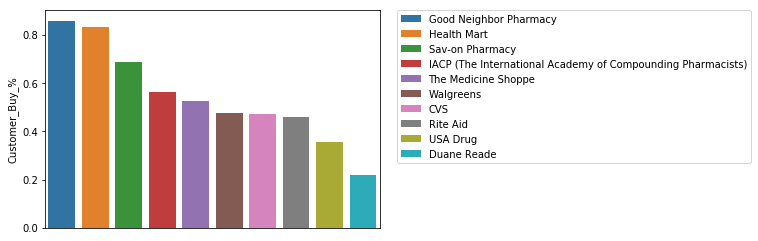

In [187]:
order_list = list(drugs_df[["Chain","Customer_Buy_%","Total Customers","% of Total Sales within category"]].sort_values(by="Customer_Buy_%", ascending=False)['Chain'])
ax = sns.barplot(x="Chain",y="Customer_Buy_%",order = order_list,hue_order=order_list,data=drugs_df,hue='Chain', dodge=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., )
ax.get_xaxis().set_visible(False)

print(drugs_df[["Chain","Customer_Buy_%","Total Customers","% of Total Sales within category"]].sort_values(by="Customer_Buy_%", ascending=False)[['Chain','Customer_Buy_%']])

<h2>Grocery Stores</h2>

In [133]:
#creating new df for only Drug Stores and Proprietary Stores
grocery_df = pd.DataFrame(stores_df[stores_df['Chain Category']=='Grocery Stores'])
#creating new column for % of sales within the category
grocery_df['% of Total Sales within category'] = grocery_df['Customers'] / grocery_df['Customers'].sum()

<h3>% of Total Sales within Grocery Category</h3>
Aldi and Kroger are by far the biggest grocery stores in terms of sales at 11% each. After an almost 6% is Trader Joe's which rounds up the top 3.

In terms of bottom 5, it is really 13 stores that are all tied for the lowest as all share a % of total sales value of half a % point (0.5%).

<b>Top 5 Grocery Stores by Sales within Grocery Category:</b>

In [141]:
grocery_df[["Chain","Customer_Buy_%","Total Customers","% of Total Sales within category"]].sort_values(by="% of Total Sales within category", ascending=False)[0:5]

,Chain,Customer_Buy_%,Total Customers,% of Total Sales within category
27,ALDI,0.526121,2431.0,0.116410
29,Kroger,0.660357,1849.0,0.111131
55,Trader Joe's,0.466133,1373.0,0.058251
65,Sprouts Farmers Market,0.581000,1000.0,0.052881
81,Publix Super Markets,0.526018,884.0,0.042323


<b>Bottom 5 Grocery Stores by Sales within Grocery Category:</b>

In [172]:
grocery_df[["Chain","Customer_Buy_%","Total Customers","% of Total Sales within category"]].sort_values(by="% of Total Sales within category", ascending=False)[-5:]

,Chain,Customer_Buy_%,Total Customers,% of Total Sales within category
258,Randall's Food Markets,0.355828,163.0,0.005279
257,ShopRite,0.355828,163.0,0.005279
255,Dominick's Finer Foods,0.355828,163.0,0.005279
254,Foods Co.,0.355828,163.0,0.005279
266,Hannaford Supermarkets,0.355828,163.0,0.005279


<h3>Customer Buy %</h3>
For top performing groceries stores, there isn't a huge difference in customer buy % in the top 10. Albertsons and Stater Bros are both tied at 76% and Turkey Hill rounds out the top 10 at 62%.

In terms of bottom 10, Giant Food Stores is the lowest at 15% with many others being tied at 35% Customer Buy %


In [174]:
print(grocery_df['Customer_Buy_%'].describe())
print("Median: {}".format(grocery_df['Customer_Buy_%'].median()))
#Statistic summary for Customer Buy %

count    45.000000
mean      0.484359
std       0.148448
min       0.155914
25%       0.355828
50%       0.480992
75%       0.581000
max       0.768722
Name: Customer_Buy_%, dtype: float64
Median: 0.4809917355371901


<b>Top 10 Grocery Stores by Customer Buy %</b>

                    Chain  Customer_Buy_%
101            Albertsons        0.768722
102  Stater Bros. Markets        0.768722
114           WinCo Foods        0.734848
145         Smart & Final        0.689349
144         Harris Teeter        0.689349
143            Jewel-Osco        0.689349
140      The Fresh Market        0.689349
29                 Kroger        0.660357
167       99 Ranch Market        0.623656
170           Turkey Hill        0.623656


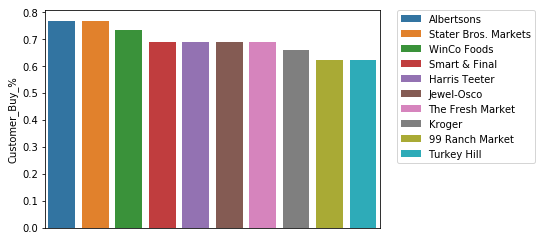

In [185]:
order_list = list(grocery_df[["Chain","Customer_Buy_%","Total Customers","% of Total Sales within category"]].sort_values(by="Customer_Buy_%", ascending=False)['Chain'][0:10])
ax = sns.barplot(x="Chain",y="Customer_Buy_%",order = order_list,hue_order=order_list,data=grocery_df,hue='Chain', dodge=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., )
ax.get_xaxis().set_visible(False)

print(grocery_df[["Chain","Customer_Buy_%","Total Customers","% of Total Sales within category"]].sort_values(by="Customer_Buy_%", ascending=False)[['Chain','Customer_Buy_%']][0:10])

<b>Bottom 10 Grocery Stores by Customer Buy %</b>

                      Chain  Customer_Buy_%
261                  Shaw's        0.355828
260               Food City        0.355828
258  Randall's Food Markets        0.355828
257                ShopRite        0.355828
255  Dominick's Finer Foods        0.355828
254               Foods Co.        0.355828
266  Hannaford Supermarkets        0.355828
203    Wegmans Food Markets        0.269767
264            Seafood City        0.217228
256       Giant Food Stores        0.155914


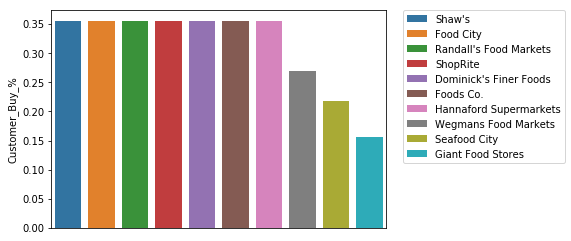

In [184]:
order_list = list(grocery_df[["Chain","Customer_Buy_%","Total Customers","% of Total Sales within category"]].sort_values(by="Customer_Buy_%", ascending=False)['Chain'][-10:])
ax = sns.barplot(x="Chain",y="Customer_Buy_%",order = order_list,hue_order=order_list,data=grocery_df,hue='Chain', dodge=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., )
ax.get_xaxis().set_visible(False)
print(grocery_df[["Chain","Customer_Buy_%","Total Customers","% of Total Sales within category"]].sort_values(by="Customer_Buy_%", ascending=False)[['Chain','Customer_Buy_%']][-10:])

<h2>Eating Places</h2>


In [157]:
#creating new df for only Drug Stores and Proprietary Stores
eating_df = pd.DataFrame(stores_df[stores_df['Chain Category']=='Eating Places'])
#creating new column for % of sales within the category
eating_df['% of Total Sales within category'] = eating_df['Customers'] / eating_df['Customers'].sum()

<h3>% of Total Sales within Category</h3>
The clear leaders in sales volume are Subway (4.9%), Starbucks (4.1%) and McDonalds (3.8%). There is likely a correlation between total stores in the country and makeup of total sales within the category since these fast food locations seem to be on every corner.

Panera Bread rounds out the bottom 10 at 2%.

Because the sample size of Eating Places is so large, there a large number of restaurants that make up less than a 10th of a % of sales. In fact there are 167 stores that each make up less than 1% of the total sales within the category.


In [199]:
print("# of Stores that make up less than 1% of total sales within Eating Places category: {}".format(len(eating_df['% of Total Sales within category'][eating_df['% of Total Sales within category']<0.01])))

# of Stores that make up less than 1% of total sales within Eating Places category: 167


<b>Top 10 Eating Places by Sales within Category:</b>

In [158]:
eating_df[["Chain","Customer_Buy_%","Total Customers","% of Total Sales within category"]].sort_values(by="% of Total Sales within category", ascending=False)[0:10]

,Chain,Customer_Buy_%,Total Customers,% of Total Sales within category
0,SUBWAY,0.493535,10131.0,0.049861
2,Starbucks US,0.461487,8945.0,0.041165
3,McDonald's,0.501287,7770.0,0.038842
5,Taco Bell,0.526105,5746.0,0.030146
6,Wendy's,0.473657,5770.0,0.027254
7,Burger King US,0.491547,5560.0,0.027254
8,Chick-fil-A,0.476609,5002.0,0.023774
9,Pizza Hut,0.631162,3408.0,0.021450
10,Chipotle Mexican Grill,0.571234,3664.0,0.020872
11,Panera Bread,0.519133,3920.0,0.020293


<b>Bottom 10 Eating Places by Sales within Category:</b>

In [188]:
eating_df[["Chain","Customer_Buy_%","Total Customers","% of Total Sales within category"]].sort_values(by="% of Total Sales within category", ascending=False)[-50:]

,Chain,Customer_Buy_%,Total Customers,% of Total Sales within category
177,White Castle,0.524887,221.0,0.001157
178,Checkers Drive-In Restaurants,0.269767,430.0,0.001157
176,Rita's Italian Ice,0.269767,430.0,0.001157
180,Freshii,0.269767,430.0,0.001157
181,El Torito,0.524887,221.0,0.001157
182,Fuddruckers,0.216822,535.0,0.001157
183,Wild Wing Cafe,0.524887,221.0,0.001157
184,Chevys Fresh Mex,0.524887,221.0,0.001157
243,Luby's,0.217228,267.0,0.000578
235,L&L Hawaiian Barbecue,0.355828,163.0,0.000578


<h3>Customer Buy %</h3>
Ruby Tuesdays is a clear leader here at 88%. Church's Chicken is abysmal with its  relative to all others since it the only Eating Place with a Customer Buy % below 15%.

In [177]:
print(eating_df['Customer_Buy_%'].describe())
print("Median: {}".format(eating_df['Customer_Buy_%'].median()))
#Statistic summary for Customer Buy %

count    194.000000
mean       0.481689
std        0.152638
min        0.099656
25%        0.355828
50%        0.493135
75%        0.600972
max        0.885745
Name: Customer_Buy_%, dtype: float64
Median: 0.4931353864854665


<b>Top 15 Eating Places by Customer Buy %</b>

                              Chain  Customer_Buy_%
43                     Ruby Tuesday        0.885745
80                         Del Taco        0.815789
92                    ZoÃ«s Kitchen        0.794922
88                Pieology Pizzeria        0.794922
44                    Jersey Mike's        0.783420
60               Long John Silver's        0.735443
112  Captain D's Seafood Restaurant        0.734848
107        California Pizza Kitchen        0.734848
106                     Jollibee US        0.734848
69                      TGI Fridays        0.714481
70                        Bob Evans        0.714481
28                  Jack in the Box        0.699713
77                   Steak 'n Shake        0.689911
121                      Baja Fresh        0.689349
125                      Taco Bueno        0.689349


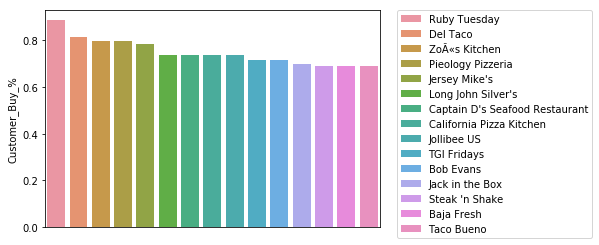

In [179]:
order_list = list(eating_df[["Chain","Customer_Buy_%","Total Customers","% of Total Sales within category"]].sort_values(by="Customer_Buy_%", ascending=False)['Chain'][0:15])
ax = sns.barplot(x="Chain",y="Customer_Buy_%",order = order_list,hue_order=order_list,data=eating_df,hue='Chain', dodge=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., )
ax.get_xaxis().set_visible(False)

print(eating_df[["Chain","Customer_Buy_%","Total Customers","% of Total Sales within category"]].sort_values(by="Customer_Buy_%", ascending=False)[['Chain',"Customer_Buy_%"]][0:15])

<b>Bottom 15 Eating Places by Customer Buy %</b>

                            Chain  Customer_Buy_%
118                    Which Wich        0.217554
237                   Taco Cabana        0.217228
251                    Seasons 52        0.217228
243                        Luby's        0.217228
230           Islands Restaurants        0.217228
214   Granite City Food & Brewery        0.217228
191                   Tim Hortons        0.216822
188                   Mimi's Cafe        0.216822
182                   Fuddruckers        0.216822
247             Uno Chicago Grill        0.155914
242  Lettuce Entertain You (LEYE)        0.155914
224          Friendly's Ice Cream        0.155914
236          Marble Slab Creamery        0.155914
238                   Shake Shack        0.155914
234              Church's Chicken        0.099656


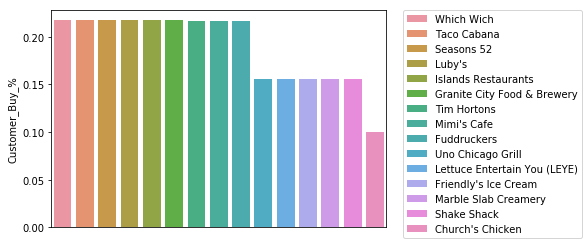

In [182]:
order_list = list(eating_df[["Chain","Customer_Buy_%","Total Customers","% of Total Sales within category"]].sort_values(by="Customer_Buy_%", ascending=False)['Chain'][-15:])
ax = sns.barplot(x="Chain",y="Customer_Buy_%",order = order_list,hue_order=order_list,data=eating_df,hue='Chain', dodge=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., )
ax.get_xaxis().set_visible(False)

print(eating_df[["Chain","Customer_Buy_%","Total Customers","% of Total Sales within category"]].sort_values(by="Customer_Buy_%", ascending=False)[['Chain',"Customer_Buy_%"]][-15:])